In [1]:
import pandas as pd
import datetime
import time
import numpy as np
from fbprophet import Prophet
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [17]:
#https://finance.yahoo.com/quote/AMZN/history/

In [2]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [3]:
amzn_dataset=pd.read_csv("AMZN.csv",header=0,parse_dates=[0],date_parser=parser)

In [59]:
amzn_dataset[['Date','Close']].tail(3)

,Date,Close
2887,2021-06-23,3503.820068
2888,2021-06-24,3449.080078
2889,2021-06-25,3401.459961


In [4]:
amzn_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2.890000e+03
mean,959.506070,969.553923,948.169069,959.189159,959.189159,4.524761e+06
std,932.431793,942.596676,920.646028,931.567155,931.567155,2.748255e+06
min,105.930000,111.290001,105.800003,108.610001,108.610001,8.813000e+05
25%,251.407505,254.404999,248.752503,251.297504,251.297504,2.852475e+06
50%,532.514984,539.170014,526.029999,533.039978,533.039978,3.848250e+06
75%,1637.757507,1659.740021,1614.962494,1637.980011,1637.980011,5.319200e+06
max,3547.000000,3554.000000,3486.689941,3531.449951,3531.449951,4.242110e+07


In [22]:
print('There are {} number of days in the dataset.'.format(amzn_dataset.shape[0]))

There are 2890 number of days in the dataset.


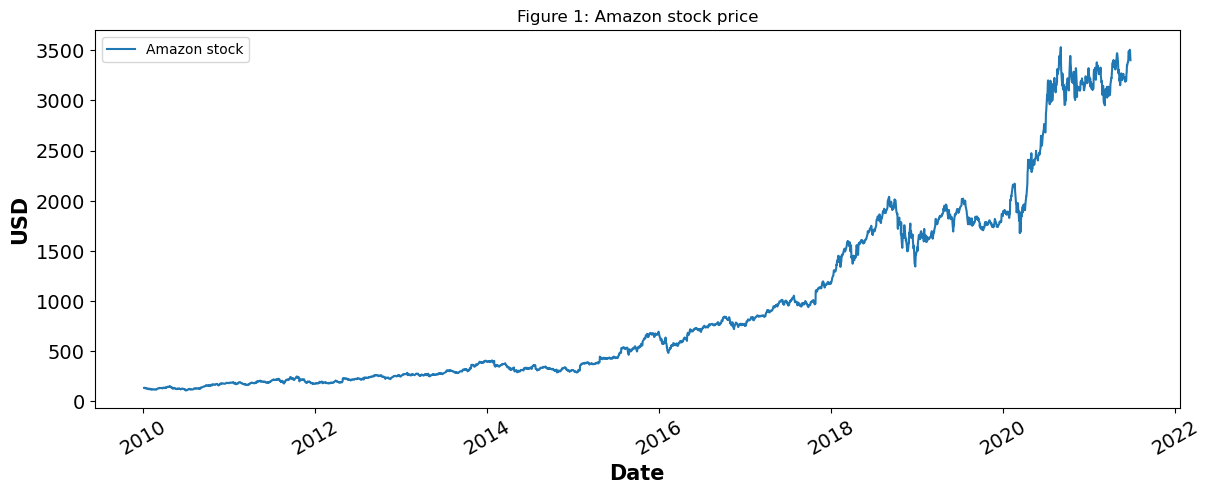

In [210]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(amzn_dataset['Date'], amzn_dataset['Close'], label='Amazon stock')
plt.xlabel('Date',fontweight='bold', fontsize=15)
plt.ylabel('USD',fontweight='bold', fontsize=15)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14)
plt.title('Figure 1: Amazon stock price')
plt.legend()
plt.show()

In [ ]:
Prophet Introduction:
Prophet is Facebooks library for time series forecasting. 
In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.) 
However, I wanted to show the simplicity of using Prophet for simple forecasting which is the main aim of this kernel.


In [ ]:
Steps for using Prophet:¶
Make sure you replace closing price for y and date for ds.
Fit that dataframe to Prophet in order to detect future patterns.
Predict the upper and lower prices of the closing price.

In [42]:
m = Prophet()

# Drop the columns
ph_df = amzn_dataset.drop(['Open','High','Low','Adj Close','Volume'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2010-01-04,133.899994
1,2010-01-05,134.690002
2,2010-01-06,132.250000
3,2010-01-07,130.000000
4,2010-01-08,133.520004


<b> Split data into Train and Test </b>

In [60]:
#split_date = '2020-09-09'
split_date='2021-02-04'
second_split='2021-06-15'
df_training = ph_df.loc[ph_df.ds <= split_date]
df_validation = ph_df.loc[(ph_df.ds> split_date) & (ph_df.ds <= second_split)]
df_test= ph_df.loc[ph_df.ds > second_split]
print(f"{len(df_training)} days of training data \n {len(df_validation)} days of  validation data \n {len(df_test)} days of testing data ")

2792 days of training data 
 90 days of  validation data 
 8 days of testing data 


In [61]:
df_validation.tail()

,ds,y
2877,2021-06-09,3281.149902
2878,2021-06-10,3349.649902
2879,2021-06-11,3346.830078
2880,2021-06-14,3383.870117
2881,2021-06-15,3383.129883


<b> Build Prophet model </b>

In [62]:
m = Prophet()

m.fit(df_training)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=90)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2877,2021-05-01,3287.826720,3094.430835,3471.409865
2878,2021-05-02,3290.155277,3109.295141,3469.403884
2879,2021-05-03,3287.359599,3114.120177,3476.637871
2880,2021-05-04,3290.820080,3109.004478,3471.994965
2881,2021-05-05,3294.335224,3104.998893,3455.935546


/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


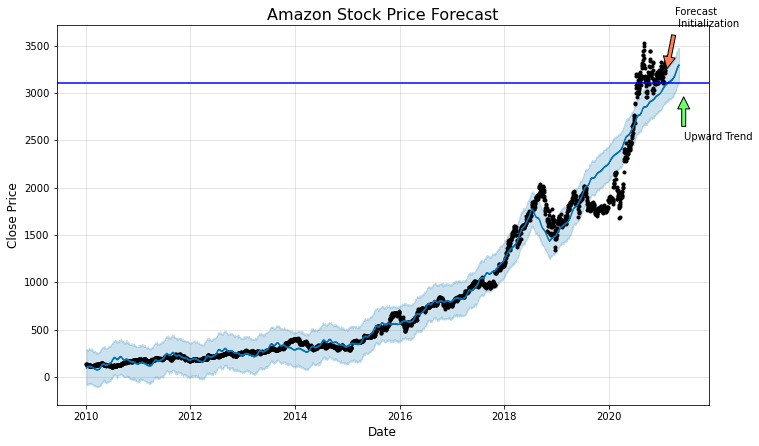

In [64]:
# Dates
starting_date = dt.datetime(2021, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2021, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2021, 2, 4)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 3209), xytext=(starting_date1,3700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 3000), xytext=(trend_date1,2500),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=3109, color='b', linestyle='-')

plt.show()

<b> Evaluate Prophet Model </b> 

In [68]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((forecast.yhat- df_validation.y) ** 2)))

# Get the mean absolute error (MAPE)
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE_error = MAPE(df_validation.y, forecast.yhat)
print('Testing Mean Absolute Error is {}'.format(MAPE_error))

Testing Mean Absolute Error is 3.1668454644668316


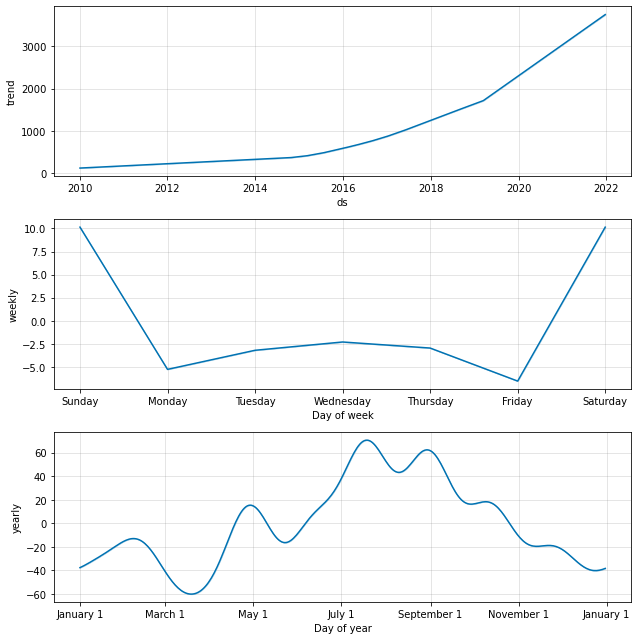

In [236]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


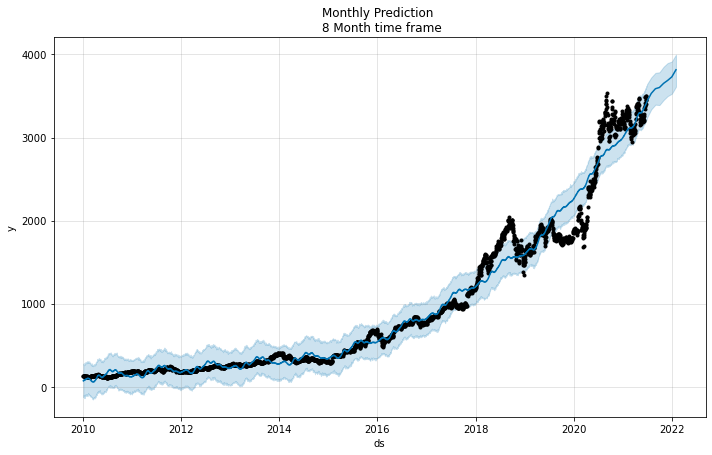

In [66]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=8, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 8 Month time frame")

plt.show()

In [ ]:
Trends:
Amazons stock price is showing signs of upper trend yearly.
Amazons stock price show upper trend signs during January (December Sales tend to give a boost to Amazons stock price)
There is no weekly trend for stock prices.